In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Santiago Silva
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






Convergencia con fixed_quad:
Primera integral:
n= 2, resultado = 1.568750862897, error absoluto = 2.33e-02
n= 4, resultado = 1.592097383358, error absoluto = 3.25e-07
n= 8, resultado = 1.592097707859, error absoluto = 8.88e-16
n=16, resultado = 1.592097707859, error absoluto = 2.44e-15
n=32, resultado = 1.592097707859, error absoluto = 2.00e-15
n=64, resultado = 1.592097707859, error absoluto = 2.66e-15
n=128, resultado = 1.592097707859, error absoluto = 2.93e-14
n=256, resultado = 1.592097707859, error absoluto = 2.33e-14
n=512, resultado = 1.592097707859, error absoluto = 4.15e-14
Segunda integral:
n= 2, resultado = 0.272410872657, error absoluto = 1.03e-04
n= 4, resultado = 0.272513861181, error absoluto = 1.93e-08
n= 8, resultado = 0.272513880503, error absoluto = 5.55e-16
n=16, resultado = 0.272513880503, error absoluto = 5.55e-17
n=32, resultado = 0.272513880503, error absoluto = 0.00e+00
n=64, resultado = 0.272513880503, error absoluto = 0.00e+00
n=128, resultado = 0.27251388050

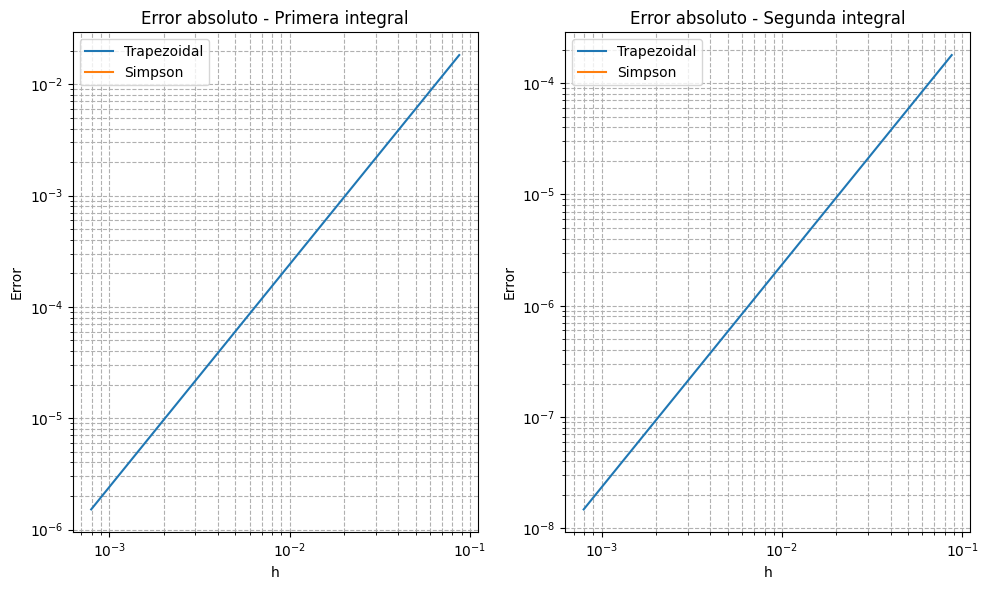

In [4]:
def f1(x): #la primera función e^3x * sen(x)
    return np.exp(3 * x) * np.sin(x)

def f2(x): # segunda función 1 / xlnx
    return 1 / (x * np.log(x))

#intervalos de integración
a1, b1 = 0, np.pi / 4 #1 integral
a2, b2 = np.e, 1 + np.e #2 integral

resultado1, _ = quad(f1, a1, b1)
resultado2, _ = quad(f2, a2, b2)

hs = []
errores_trap1 = []
errores_simp1 = []
errores_trap2 = []
errores_simp2 = []

#convergencia
for n in range(10, 1000, 10):
    x1 = np.linspace(a1, b1, n)
    y1 = f1(x1)

    x2 = np.linspace(a2, b2, n)
    y2 = f2(x2)

    h = (b1 - a1) / (n - 1)

    #método trapezoidal
    trap1 = trapezoid(y1, x1)
    trap2 = trapezoid(y2, x2)

    #simpson
    if n % 2 == 1:
        simp1 = simpson(y1, x1)
        simp2 = simpson(y2, x2)

        errores_simp1.append(abs(resultado1 - simp1))
        errores_simp2.append(abs(resultado2 - simp2))
    else:
        errores_simp1.append(np.nan) #si n es  par, no se puede aplicar simpson correctamente
        errores_simp2.append(np.nan)

    errores_trap1.append(abs(resultado1 - trap1))
    errores_trap2.append(abs(resultado2 - trap2))

    hs.append(h) #guardamos el valor de h

print("Convergencia con fixed_quad:")

print("Primera integral:")
for n in [2, 4, 8, 16, 32, 64, 128, 256, 512]:
    resultado, _ = fixed_quad(f1, a1, b1, n = n)
    error = abs(resultado - resultado1)
    print(f"n={n:>2}, resultado = {resultado:.12f}, error absoluto = {error:.2e}")

print("Segunda integral:")
for n in [2, 4, 8, 16, 32, 64, 128, 256, 512]:
    resultado, _ = fixed_quad(f2, a2, b2, n = n)
    error = abs(resultado - resultado2)
    print(f"n={n:>2}, resultado = {resultado:.12f}, error absoluto = {error:.2e}")


#graficas
plt.figure(figsize=(10, 6))
#primera integral
plt.subplot(1, 2, 1)
plt.loglog(hs, errores_trap1, label = "Trapezoidal")
plt.loglog(hs, errores_simp1, label = "Simpson")
plt.title("Error absoluto - Primera integral")
plt.xlabel("h")
plt.ylabel("Error")
plt.legend()
plt.grid(True, which="both", ls="--")
#segunda integral
plt.subplot(1, 2, 2)
plt.loglog(hs, errores_trap2, label = "Trapezoidal")
plt.loglog(hs, errores_simp2, label = "Simpson")
plt.title("Error absoluto - Segunda integral")
plt.xlabel("h")
plt.ylabel("Error")
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [9]:
#quad
def integral_z(y, x):

    integrando = lambda z: (1 / y) * np.sin(z / y)
    res, _ = quad(integrando, 0, x * y)
    return res

def integral_y(x):

    integrando = lambda y: integral_z(y, x)
    res, _ = quad(integrando, 0, x)
    return res

resultado_quad, error_quad = quad(integral_y, 0, np.pi)

print("Integración usando quad:")
print(f"Valor = {resultado_quad:.16f}, Error estimado = {error_quad:.10e}")

#tplquad
f = lambda z, y, x: (1 / y) * np.sin(z / y)

a, b = 0, np.pi
g = lambda x: 0
h = lambda x: x
r = lambda x, y: 0
q = lambda x, y: x * y

resultado_tplquad, error_tplquad = tplquad(f, a, b, g, h, r, q)

print("Integración usando tplquad:")
print(f"Valor = {resultado_tplquad:.16f}, Error estimado = {error_tplquad:.10e}")


print("Comparación entre quad y tplquad:")
print(f"Diferencia absoluta = {abs(resultado_quad - resultado_tplquad):.10e}")


Integración usando quad:
Valor = 6.9348022005446790, Error estimado = 7.6991770743e-14
Integración usando tplquad:
Valor = 6.9348022005446790, Error estimado = 7.6991770743e-14
Comparación entre quad y tplquad:
Diferencia absoluta = 0.0000000000e+00


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [6]:
import numpy as np
from scipy.special import roots_legendre

def gauss_quad_general(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura de Gauss-Legendre.

    Parameters:
    - func: La función a integrar.
    - a, b: Límites de integración.
    - n: Número de puntos de cuadratura.

    Returns:
    - Aproximación de la integral.
    """
    # Raíces y pesos en el intervalo [-1, 1]
    x, w = roots_legendre(n)

    # Cambio de variable al intervalo [a, b]
    x_mapeado = 0.5 * (b - a) * x + 0.5 * (a + b)
    integral = 0.5 * (b - a) * np.sum(w * func(x_mapeado))
    return integral

# Parámetros de cuadratura
n = 1000 #número de puntos

def integrar_z(y, x):
    f_z = lambda z: (1 / y) * np.sin(z / y)
    return gauss_quad_general(f_z, 0, x * y, n)

def integrar_y(x):
    f_y = lambda y: integrar_z(y, x)
    return gauss_quad_general(f_y, 0, x, n)

f_x = lambda x: integrar_y(x)
resultado = gauss_quad_general(f_x, 0, np.pi, n)

print(f"Integral con cuadratura de Gauss con n = {n}:")
print(f"Integral ≈ {resultado:.16f}")

Integral con cuadratura de Gauss con n=1000:
Integral ≈ 9.1073319663355843


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [16]:
#trapezoidal adaptativo: duplica puntos hasta convergencia
def trapezoidal_adaptativo(f, a, b, tol = 1e-5, max_iter = 20):

    n = 2
    x = np.linspace(a, b, n)
    y = f(x)
    I_old = trapezoid(y, x) #primera aproximación

    #itera duplicando puntos hasta convergencia
    for i in range(max_iter):

        n = n * 2 - 1  #duplica intervalos
        x = np.linspace(a, b, n)
        y = f(x)
        I_new = trapezoid(y, x)

        if abs(I_new - I_old) < tol:
            return I_new, n
        I_old = I_new

    return I_new, n

#simpson
def simpson_adaptativo(f, a, b, tol = 1e-5, max_iter = 20):

    n = 3
    x = np.linspace(a, b, n)
    y = f(x)
    I_old = simpson(y, x)

    for i in range(max_iter):
        n = n * 2 - 1
        x = np.linspace(a, b, n)
        y = f(x)
        I_new = simpson(y, x)

        if abs(I_new - I_old) < tol:
            return I_new, n
        I_old = I_new

    return I_new, n

def gauss_adaptativo(f, a, b, tol=1e-5, max_n=50):
    I_old = fixed_quad(f, a, b, n=1)[0]

    for n in range(2, max_n + 1):
        I_new = fixed_quad(f, a, b, n=n)[0]

        if abs(I_new - I_old) < tol:
            return I_new, n
        I_old = I_new

    return I_new, max_n

#interal 1
a1 = 1e-12
b1 = np.pi/2 - 3.84e-4

def f1(x):
    return 1 / np.sqrt(np.tan(x))

trap1, n_trap1 = trapezoidal_adaptativo(f1, a1, b1)
simp1, n_simp1 = simpson_adaptativo(f1, a1, b1)
gauss1, n_gauss1 = gauss_adaptativo(f1, a1, b1)

# Imprimir resultados
print("Integral 1:")
print(f"Trapezoidal: {trap1:.10f} (n={n_trap1})")
print(f"Simpson:     {simp1:.10f} (n={n_simp1})")
print(f"Gauss:       {gauss1:.10f} (n={n_gauss1})")
print("")

#integral 2, truncar en A=224 (error de truncamiento < 1e-5)
a2 = 1
b2 = 224

def f2(x):

    return np.cos(x) / x**3

trap2, n_trap2 = trapezoidal_adaptativo(f2, a2, b2)
simp2, n_simp2 = simpson_adaptativo(f2, a2, b2)
gauss2, n_gauss2 = gauss_adaptativo(f2, a2, b2)

print("Integral 2:")
print(f"Trapezoidal: {trap2:.10f} (n={n_trap2})")
print(f"Simpson:     {simp2:.10f} (n={n_simp2})")
print(f"Gauss:       {gauss2:.10f} (n={n_gauss2})")
print("")

#integral 3
def F(x):

    if x == 0:

        return 0.0 # Si x=0, sin(x)=0 -> integral=0

    a_int = 0
    b_int = np.sin(x)

    def g(y):

        return 1 / np.sqrt(1 - y**2)


    return fixed_quad(g, a_int, b_int, n=50)[0]


F_vec = np.vectorize(F)


a3 = 0
b3 = np.pi/4

trap3, n_trap3 = trapezoidal_adaptativo(F_vec, a3, b3)
simp3, n_simp3 = simpson_adaptativo(F_vec, a3, b3)
gauss3, n_gauss3 = gauss_adaptativo(F_vec, a3, b3)


print("Integral 3:")
print(f"Trapezoidal: {trap3:.10f} (n={n_trap3})")
print(f"Simpson:     {simp3:.10f} (n={n_simp3})")
print(f"Gauss:       {gauss3:.10f} (n={n_gauss3})")

Integral 1:
Trapezoidal: 2.9684802354 (n=1048577)
Simpson:     2.4699575329 (n=2097153)
Gauss:       2.1998304940 (n=50)

Integral 2:
Trapezoidal: 0.0181199263 (n=65537)
Simpson:     0.0181177237 (n=8193)
Gauss:       0.0180421159 (n=50)

Integral 3:
Trapezoidal: 0.3084251375 (n=3)
Simpson:     0.3084251375 (n=5)
Gauss:       0.3084251375 (n=2)
